In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('train.csv')
df.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [3]:
df.shape

(165034, 14)

In [4]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Variable **Gender**

In [6]:
#VALORES UNICOS DE LA VARIABLE
print(df.Gender.unique())

['Male' 'Female']


In [7]:
#REEMPLAZO DE VALORES
df.loc[df.Gender == 'Female', 'Gender'] = '0'
df.loc[df.Gender == 'Male', 'Gender'] = '1'
df.Gender = df.Gender.astype(int)

#RESULTADO
print(df.Gender.unique())

[1 0]


### Variable **Age**

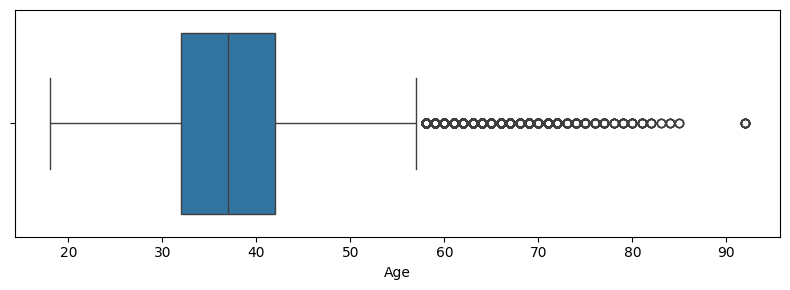

In [8]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df.Age, orient='h')
plt.tight_layout()
plt.show()

In [9]:
#IMPORTACION DE MODELO
from sklearn.covariance import EllipticEnvelope

#INSTANCIA Y PREDICCION
cov_det = EllipticEnvelope(contamination=0.025)
out_pred = cov_det.fit_predict(df.Age.values.reshape(-1,1))

#DATAFRAME COMPLEMENTARIO
out_pred = pd.concat([df.Age,
                      pd.Series(out_pred, name='is_outlier')],
                      axis=1)

#OUTLIERS ENCONTRADOS
out_pred.is_outlier.value_counts()

is_outlier
 1    161018
-1      4016
Name: count, dtype: int64

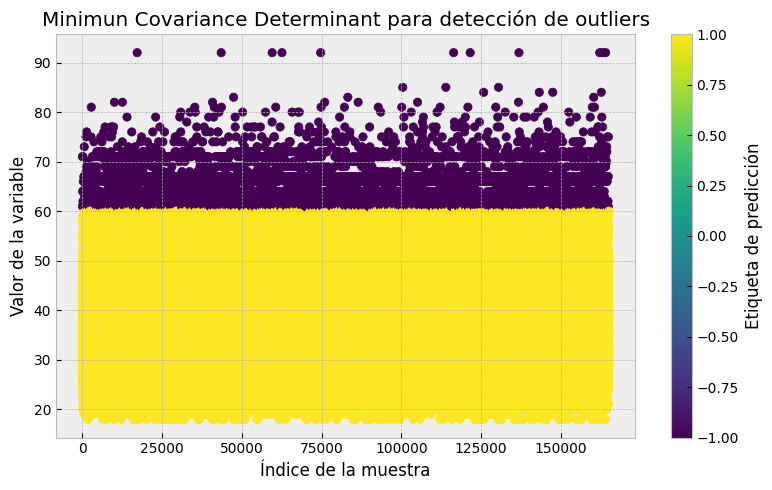

In [10]:
#GRAFICO DE OUTLIERS
mpl.style.use('bmh')
plt.figure(figsize=(8,5))
plt.scatter(out_pred.index, out_pred.Age, c=out_pred.is_outlier, cmap='viridis')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de la variable')
plt.title('Minimun Covariance Determinant para detección de outliers')
plt.colorbar(label='Etiqueta de predicción')
plt.tight_layout()
plt.show()
mpl.style.use('default')

In [11]:
#SE TOMA LA MEDIANA DE LA VARIABLE PARA REALIZAR LA IMPUTACION
median = df.Age.median()

#IMPUTACION
out_pred['age_imput'] = out_pred.apply(lambda x: median if x.is_outlier == -1 else x.Age, axis=1)

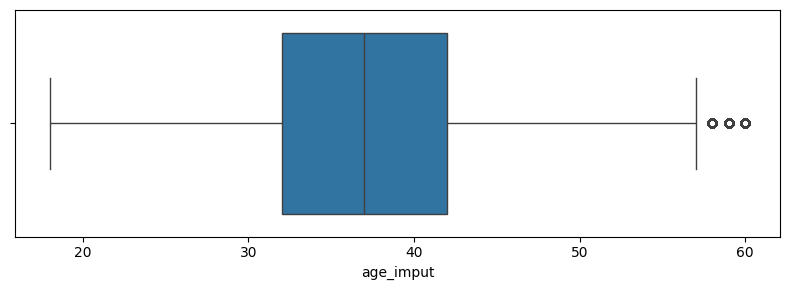

In [12]:
plt.figure(figsize=(8,3))
sns.boxplot(x=out_pred.age_imput, orient='h')
plt.tight_layout()
plt.show()

In [13]:
#SE COMBINAN LOS VALORES IMPUTADOS CON EL DATAFRAME PRINCIPAL
df.Age = out_pred.age_imput

df.Age.describe()

count    165034.000000
mean         37.424675
std           7.679849
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          60.000000
Name: Age, dtype: float64